# Prpbability & Distributions

[Questions](https://classroom.google.com/u/0/c/NTM2OTY0MjY0MTk0/a/NTU3NDUzMDMzNjI0/details)

## 1. Basic Level

**Question 1: Normal Distribution**

_[reference](https://www.investopedia.com/terms/n/normaldistribution.asp)_

In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

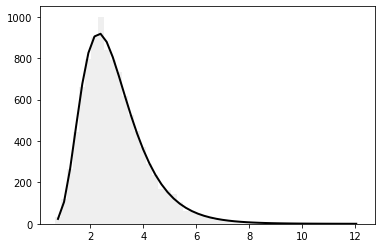

In [19]:
np.random.seed(7)
samples = np.random.lognormal(mean=1.,sigma=0.4, size=10000)
shape, loc, scale = scipy.stats.lognorm.fit(samples, loc=0)
num_bins = 50


clr = "#EFEFEF"
counts, edges, patches = plt.hist(samples, bins=num_bins, color = clr)
centers = 0.5*(edges[:-1]+edges[1:])

cdf = scipy.stats.lognorm.cdf(edges, shape, loc=loc, scale=scale)
prob = np.diff(cdf)
plt.plot(centers, samples.size*prob, 'k-', linewidth=2)
plt.show()

**Question 2: Binomial Distribution**


In [20]:
import seaborn
from scipy.stats import binom
import matplotlib.pyplot as plt

C:\Users\Akash Jariwala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


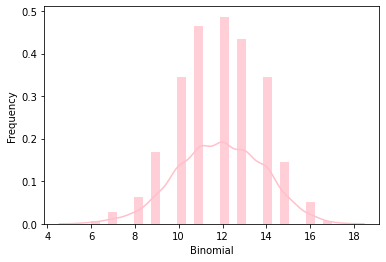

In [26]:
data = binom.rvs(n=17,p=0.7,loc=0,size=1010)

ax = seaborn.distplot(data,kde=True,color='pink',hist_kws={"linewidth":22, 'alpha':0.77})
ax.set(xlabel="Binomial", ylabel='Frequency')
plt.show()

**Question 3: Poisson Distribution**

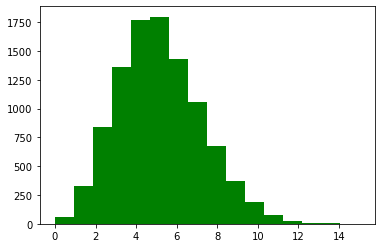

In [27]:
s = np.random.poisson(5,10000)
plt.hist(s,16, color = "Green")
plt.show()

**Question 4: Bernouli Distibution**

(array([  1.,   9.,   0.,  51.,   0., 132.,   0., 204., 241.,   0., 185.,
          0., 123.,   0.,  48.,   6.]),
 array([0.    , 0.5625, 1.125 , 1.6875, 2.25  , 2.8125, 3.375 , 3.9375,
        4.5   , 5.0625, 5.625 , 6.1875, 6.75  , 7.3125, 7.875 , 8.4375,
        9.    ]),
 <BarContainer object of 16 artists>)

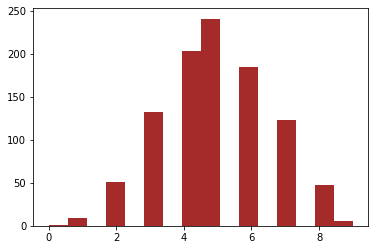

In [29]:
s=np.random.binomial(10, 0.5, 1000)
plt.hist(s,16, color="Brown")

**Question 5:**

**a) Uniform** 

1D Array with random values: 
 [0.9839739  0.04650858 0.64966082 0.14377257 0.05921865]


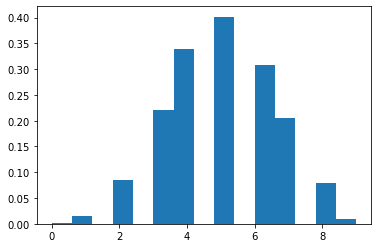

In [31]:
array = np.random.uniform(0.0,1.0,5)
print("1D Array with random values: \n", array)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.show()

**b) Exponential** 

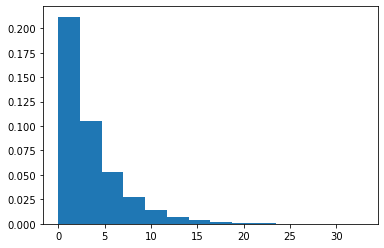

In [33]:
array = np.random.exponential(3.45, 10000)
count, bins, ignored = plt.hist(array, 14, density = True)
plt.show()

**c) Weibull**

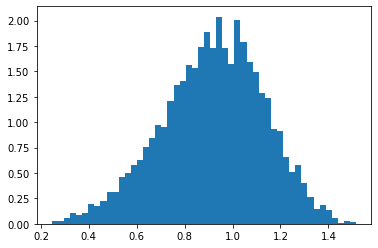

In [34]:
array = np.random.weibull(5,5000)
plt.hist(array, bins=50, density=True)
plt.show()

**d) Gaussian**

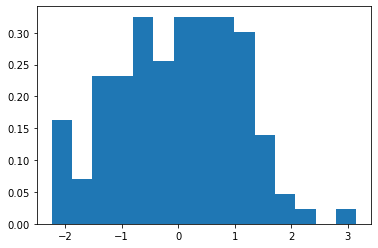

In [35]:
array = np.random.normal(loc=0.0, scale=1.0, size=120)
count, bins, ignored = plt.hist(array, 15, density = True)
plt.show()

# Intermediate Level

**1. Write a python program to define a distribution with a **mean of 50** and a **standard deviation of 5** and sample random numbers from this distribution.**

In [44]:
x = np.random.normal(loc=50,scale=5,size=(3,3))
x = np.array(x)
x = x.reshape(1,-1)
x

array([[54.37248792, 44.10887338, 41.08411853, 48.44935574, 42.1721649 ,
        50.10149721, 46.27281426, 48.75662218, 46.66071318]])

**2. For the above distribution calculate each observation using the probability density function. A plot of these values would give us the tell-tale bell shape. The start and end range must be given by users.**

In [48]:
from scipy.integrate import quad
from sklearn.neighbors import KernelDensity
import seaborn as sns

In [46]:
start = int(input("Enter Start value: "))
end = int(input("Enter end value: "))

Enter Start value: 30
Enter end value: 60


Probability:  0.1022728778211682 



C:\Users\Akash Jariwala\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


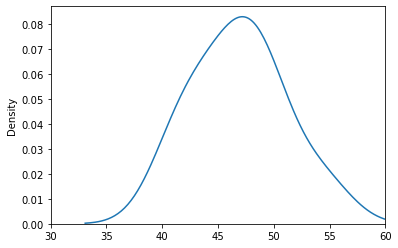

In [50]:
kd = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(x)
probability = quad(lambda x2: np.exp(kd.score_samples(x)), start, end)[0]

print("Probability: ",probability,"\n")
sns.distplot(x, hist=False)
plt.xlim(start, end)
plt.show()

**3. Write a python program to display 20 numbers from the exponential distribution. In addition, for the observations between 50 and 70 do calculate the probability and cumulative probability for each and plot the result.**

In [51]:
from scipy.stats import expon

In [52]:
beta = 50
n = 20

sample = np.random.exponential(beta,n)
print("sample generated numbers\n")
print(sample,"\n")

dist = expon(beta)
values = [value for value in range(50,70)]
probabiliies = [dist.pdf(value) for value in values]

sample generated numbers

[1.80602801e+01 1.11420381e+01 2.10015237e+01 5.19015320e+01
 5.19652275e+01 1.23585192e+01 2.27482495e+01 7.46754651e+01
 1.61682476e+01 1.43354790e+01 1.97088752e+00 1.68827789e+00
 3.68513758e-02 6.14975079e+01 1.06258080e+01 8.04999467e+01
 2.72661839e+01 3.34509282e+01 4.84457159e+01 3.81211713e+01] 



Probability Density Function


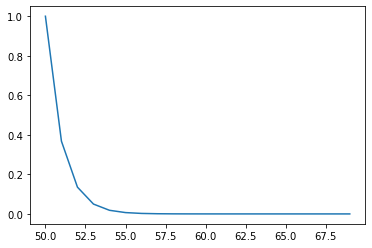

Cummulative Probabilities


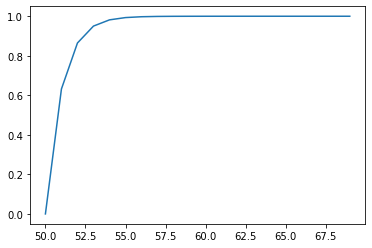

In [54]:
print("Probability Density Function")
plt.plot(values, probabiliies)
plt.show()

print("Cummulative Probabilities")
cprobs = [dist.cdf(value) for value in values]
plt.plot(values, cprobs)
plt.show()

**4. A survey found that 65% of all the financial consumers were very satisfied with their primary financial institutions. Suppose that 25 financial consumers are sampled and if survey results still hold true today, what is the probability that exactly 19 are very satisfied with their primary financial institutions?**

In [55]:
from scipy.stats import binom
print("Result: ",binom.pmf(19,25,0.65))

Result:  0.09077799859322791


**5. Bank customers arrive randomly on weekday afternoons at an average of 3.2 customers
per 4 minutes. What is the probability of having more than 7 customers in a 4-minute
interval on a weekday afternoon? Accept the inputs from the user and plot the appropriate
probability distribution functions.**

In [5]:
from scipy.stats import poisson

prob = poisson.cdf(7,3.2)
res = 1-prob
res

0.01682984174895752

**6. Suppose the amount of time it takes to assemble a plastic module ranges from 27 to 39
seconds and that assembly times are uniformly distributed. Describe the distribution.
What is the probability that a given assembly will take between 30 and 35 seconds to complete?**

In [59]:
from scipy.stats import uniform

U = np.arange(27,40,1)
print(U)
uniform.mean(loc=27, scale=12)
res = uniform.cdf(np.arange(30,36,1),loc=27,scale = 12)
prob = res[-1]-res[0]
print(f"\nResult: {prob}")

[27 28 29 30 31 32 33 34 35 36 37 38 39]

Result: 0.41666666666666663
